In [1]:
!pip install tensorflow

  Using cached numpy-1.18.5-cp37-cp37m-win_amd64.whl (12.7 MB)
  Using cached scipy-1.4.1-cp37-cp37m-win_amd64.whl (30.9 MB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached protobuf-3.19.6-cp37-cp37m-win_amd64.whl (896 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Rolling back uninstall of protobuf
  Moving to c:\users\manaswi\anaconda3\anaconda\envs\tgpu\lib\site-packages\protobuf-3.20.3-py3.7.egg-info
   from c:\users\manaswi\anaconda3\anaconda\envs\tgpu\lib\site-packages\~rotobuf-3.20.3-py3.7.egg-info


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Manaswi\\anaconda3\\anaconda\\envs\\tgpu\\Lib\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
!pip install matplotlib

In [3]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import *
from pylab import *

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Loading the Data

In [5]:
data = tf.keras.preprocessing.image_dataset_from_directory('data')

Found 100000 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
#len(batch) = 2
#batch[0].shape = (32, 256, 256, 3)

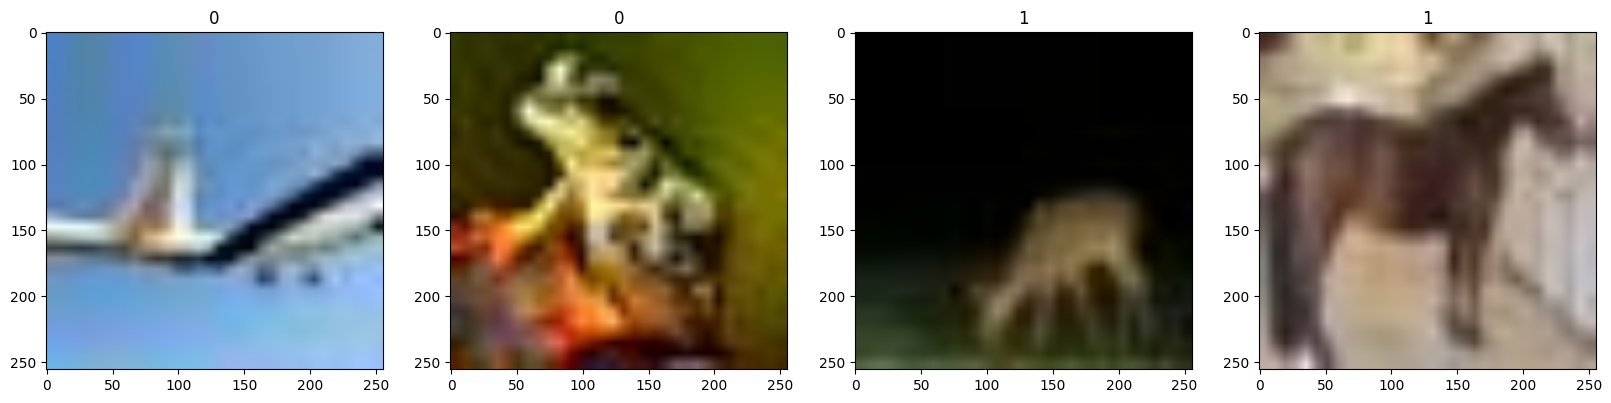

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scaling the Data

In [8]:
data = data.map(lambda x,y : (x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

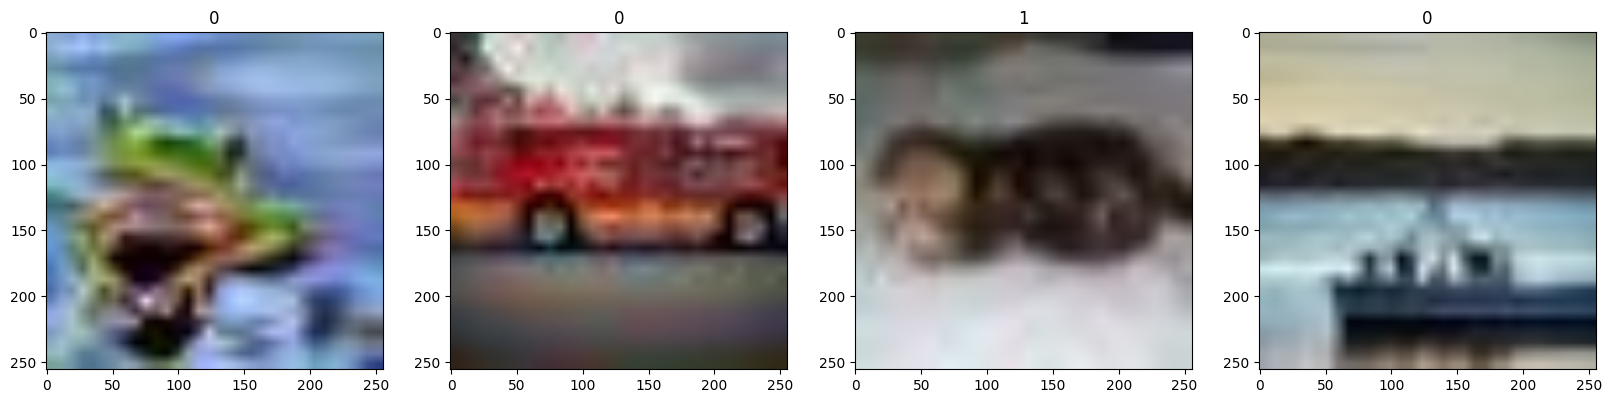

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [10]:
len(data)

3125

In [11]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Building the model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import SGD

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16,(3,3),1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())


model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [16]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 16)        0

## Training

In [18]:
logdir = 'logs'

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [21]:
hist = model.fit(train, epochs = 8, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/8
2187/2187 [==============================] - 2208s 1s/step - loss: 0.3785 - accuracy: 0.8239 - val_loss: 0.2758 - val_accuracy: 0.8837
Epoch 2/8
2187/2187 [==============================] - 1940s 887ms/step - loss: 0.2349 - accuracy: 0.9034 - val_loss: 0.2052 - val_accuracy: 0.9194
Epoch 3/8
2187/2187 [==============================] - 1918s 877ms/step - loss: 0.1849 - accuracy: 0.9261 - val_loss: 0.2235 - val_accuracy: 0.9147
Epoch 4/8
2187/2187 [==============================] - 1860s 851ms/step - loss: 0.1450 - accuracy: 0.9428 - val_loss: 0.2765 - val_accuracy: 0.9074
Epoch 5/8
2187/2187 [==============================] - 1902s 870ms/step - loss: 0.1182 - accuracy: 0.9542 - val_loss: 0.2781 - val_accuracy: 0.9071
Epoch 6/8
2187/2187 [==============================] - 2018s 923ms/step - loss: 0.0924 - accuracy: 0.9648 - val_loss: 0.2217 - val_accuracy: 0.9234
Epoch 7/8
2187/2187 [==============================] - 2177s 995ms/step - loss: 0.0729 - accuracy: 0.9730 - val_los

## Plotting Perfomance

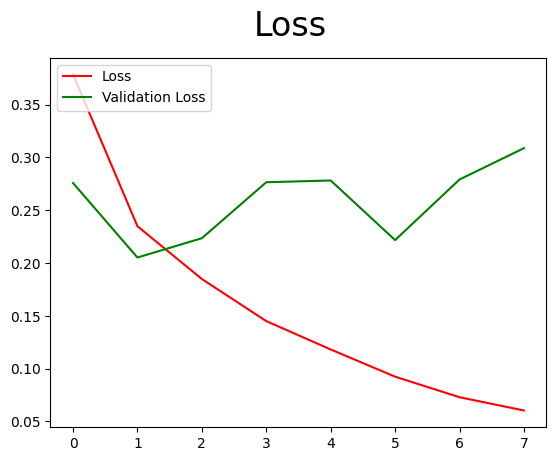

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = 'Loss')
plt.plot(hist.history['val_loss'], color = 'green', label = 'Validation Loss')
fig.suptitle('Loss', fontsize = 24)
plt.legend(loc = 'upper left')
plt.show()

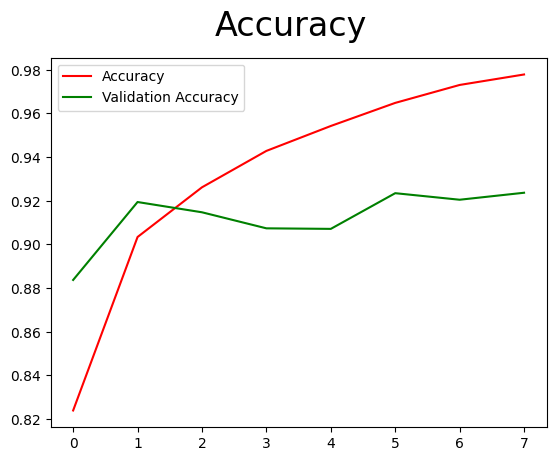

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'red', label = 'Accuracy')
plt.plot(hist.history['val_accuracy'], color = 'green', label = 'Validation Accuracy')
fig.suptitle('Accuracy', fontsize = 24)
plt.legend(loc = 'upper left')
plt.show()

## Evaluating Perfomance

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [25]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [26]:

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

In [27]:
print(f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}')

Precision: 0.9271944165229797, Recall: 0.9161094427108765, Accuracy: 0.9229767918586731


## Testing

In [28]:
import cv2

In [ ]:
img = cv2.imread('')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
if yhat > 0.5:
    print('The image is real.')
else: 
    print('The image is AI-generated')

## Saving the Model

In [29]:
from tensorflow.keras.models import load_model

In [30]:
tf.keras.models.save_model(model, 'AIImageClassifier.hdf5')

## Deploying the model on streamlit

In [31]:
pip install streamlit

In [41]:
%%writefile app.py
import streamlit as st

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation = True)
def load_model():
    model = tf.keras.models.load_model('/models/AIImageClassifier.hdf5')
    return model
model = load_model()

st.write("""

        # AI Image Classifier
         """
        )

file = st.file_uploader("Please upload an image", type = ['jpg', 'png'])
from PIL import Image, ImageOps

def import_and_predict(image_data, model):
    
    size = (180,180)
    image = imageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis, ...]
    prediction = model.predict(img_reshape)
    
    return prediction

if file is None:
    st.text('Please upload an image file')
    
else:
    image = Image.open(file)
    st.image = (image, use_column_width = True)
    predictions = import_and_predict(image, model)
    class_names = ['fake', 'real']
    string = "This image is most likely" + class_names[np.argmax(predictions)]
    st.success(string)

Overwriting app.py


In [33]:
!ngrok config add-authtoken 2S0wrNstTE8Zi3OdUW7pua1UQfx_5RaonfVBMsmaau7ng8Nnw

Authtoken saved to configuration file: C:\Users\Manaswi\AppData\Local/ngrok/ngrok.yml


In [34]:
!pip install pyngrok

In [35]:
from pyngrok import ngrok

In [37]:
!streamlit run app.py & npx localtunnel --port 8501

^C
